## Last Lecture

It's the last class! So sad :(

Today we will finish the example from Wednesday and go over some more advanced topics with Neural Networks, including an expanded vocabulary of possible network architectures. This second part will be more "demonstration" showing the basic concepts and the possibilities with these advanced architectures. They can be straight freaky!

In [3]:
## Neural Network for NLP

In [5]:
from sklearn.datasets import fetch_20newsgroups
news_train = fetch_20newsgroups(subset='train', categories=['sci.space','rec.autos','sci.electronics','comp.graphics'])



In [6]:
news_train.target_names

['comp.graphics', 'rec.autos', 'sci.electronics', 'sci.space']

In [7]:
%pylab inline
space = np.argwhere(news_train.target == 3) 
electronics = np.argwhere(news_train.target == 2) 
autos = np.argwhere(news_train.target == 1) 
graphics = np.argwhere(news_train.target == 0)

Populating the interactive namespace from numpy and matplotlib


In [8]:
import spacy

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en")


In [9]:
# the following is from https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [28]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer, min_df=0.03, max_df=0.9, max_features=100, ngram_range=(1,2))

In [29]:
X = tfidf_vector.fit_transform(news_train.data)

In [30]:
tfidf_vector.get_feature_names()

['--',
 '..',
 '...',
 '1',
 '10',
 '2',
 '3',
 '4',
 '5',
 'article',
 'available',
 'base',
 'build',
 'buy',
 'c',
 'car',
 'center',
 'color',
 'come',
 'computer',
 'cost',
 'datum',
 'day',
 'design',
 'distribution',
 'doe',
 'drive',
 'earth',
 'etc',
 'file',
 'find',
 'good',
 'graphic',
 'help',
 'high',
 'host',
 'image',
 'include',
 'information',
 'interest',
 'know',
 'launch',
 'like',
 'list',
 'little',
 'long',
 'look',
 'lot',
 'low',
 'mail',
 'model',
 'nasa',
 'need',
 'new',
 'nntp',
 'nntp post',
 'old',
 'orbit',
 'organization university',
 'people',
 'point',
 'post',
 'post host',
 'power',
 'problem',
 'program',
 'project',
 'question',
 'read',
 'reply',
 'research',
 'right',
 'run',
 'satellite',
 'science',
 'send',
 'software',
 'space',
 'speed',
 'state',
 'system',
 'technology',
 'thank',
 'thing',
 'think',
 'time',
 'try',
 'university',
 'usa',
 'use',
 'version',
 'want',
 'way',
 'wire',
 'work',
 'world',
 'write',
 'x',
 'year',
 '\ufeff1

In [31]:
y = news_train.target


In [32]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

# 3 choices of mtry
parameters = {'n_estimators':[100],  'max_features':[5, 8,10,'auto'], 
                        'criterion': ['gini','entropy']}

rf_tune = model_selection.GridSearchCV(RandomForestClassifier(), parameters, 
                                   n_jobs = -1, cv = 5,verbose=1)
rf_opt = rf_tune.fit(X, y)

print("Best zero-one score: " + str(rf_opt.best_score_) + "\n")
print("Optimal Model:\n" + str(rf_opt.best_estimator_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   18.9s finished


Best zero-one score: 0.7929720575783235

Optimal Model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [33]:
pred_rf = rf_opt.predict(X) 


In [34]:
# compute zero-one loss / score & confusion matrix
from sklearn import metrics

rf_01 = metrics.zero_one_loss(news_train.target, pred_rf) # zero-one loss
rf_01_score = metrics.accuracy_score(news_train.target, pred_rf) # zero-one score
rf_confmat = metrics.confusion_matrix(news_train.target, pred_rf) # conf mat

print("Zero-One Loss: " + str(rf_01))
print("Zero-One Score: " + str(rf_01_score))
print("Confusion Matrix:")
print("[i, j] is the # of objects truly in group i but predicted to be in group j")
print(rf_confmat)

Zero-One Loss: 0.0
Zero-One Score: 1.0
Confusion Matrix:
[i, j] is the # of objects truly in group i but predicted to be in group j
[[584   0   0   0]
 [  0 594   0   0]
 [  0   0 591   0]
 [  0   0   0 593]]


Hurray! It works even in this complicated case!

## More advanced models for natural language...

We want words that are similar have a similar output (embedding) vector.


> Word2vec, introduced in Distributed Representations of Words and Phrases and their Compositionality (Mikolov et al., NIPS 2013), has attracted a lot of attention in recent years due to its efficiency to produce relevant word embeddings (i.e. vector representations of words). Word2vec is a shallow neural network trained on a large text corpus. The meaning of a word is learned from its surrounding words in the sentences and encoded in a vector of real values.  -- https://www.kernix.com/blog/similarity-measure-of-textual-documents_p12

`spacy` has pretrained models that turn tokens into vectors, trained off of a large corpus from the internet.

In [35]:
import en_core_web_lg
nlp = en_core_web_lg.load() #this could take a while!

Here we will use this "tokenizer" to turn words into a multidimensional vector...

In [36]:
token = nlp(u'dog')

In [40]:
token.vector.shape #a 300 dimensional vector

(300,)

In [44]:
#How similar are these words?
tokens = nlp(u'dog cat avocado love')

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

dog dog 1.0
dog cat 0.80168545
dog avocado 0.13001472
dog love 0.35871536
cat dog 0.80168545
cat cat 1.0
cat avocado 0.1548489
cat love 0.34694093
avocado dog 0.13001472
avocado cat 0.1548489
avocado avocado 1.0
avocado love 0.19207825
love dog 0.35871536
love cat 0.34694093
love avocado 0.19207825
love love 1.0


Closer to 1 means that the words are more similar, hence "cat" is closer to "dog" than it is "avocado"! Stangely though, I really love "avocados" and they aren't that similar to "love" :(

Lets now see how close different word combinations are!

<img src="http://jalammar.github.io/images/word2vec/queen-woman-girl-embeddings.png">

<img src="http://jalammar.github.io/images/word2vec/king-analogy-viz.png">

In [55]:
target = nlp("Ponies are beautiful animals.")
 
doc1 = nlp("Horses are amazing.")
doc2 = nlp("Dogs are barking animals.")
doc3 = nlp("Beijing is the capital of China.")
 
print(target.similarity(doc1)) 
print(target.similarity(doc2))  
print(target.similarity(doc3))  

0.9088606960960698
0.8266815201632927
0.5413006692559214


So we are able to capture some aspect of the meaning of a whole sentance using word2vec!


In [57]:
target = nlp("Ben is a great teacher.")
 
doc1 = nlp("Ben is a horrible teacher.")
doc2 = nlp("Ben likes physics.")
doc3 = nlp("Beijing is the capital of China.")
 
print(target.similarity(doc1)) 
print(target.similarity(doc2))  
print(target.similarity(doc3))  

0.9606034666843563
0.697507441618815
0.6853217299318243


# More Neural Network Architectures!

There is an ever expanding bounty of neural network architectures....

<img src="http://www.asimovinstitute.org/wp-content/uploads/2016/09/neuralnetworks.png">

Source: http://www.asimovinstitute.org/neural-network-zoo/

So far we have only grazed the surface of possible methods...

## Autoencoders

A form of non-parametric representation learning with neutral nets, where the architecture of the network is used to reduce the dimensionality of the data. 

As the name suggests, autoencoders uses the data itself to learn the best way to represent it in a compact way--it's a form of semantic compression. This is a family of self- (or un-) supervised modeling. This differs from how we've used neural networks so far as a purely supervised technique (i.e. for classifciation or regression).

<img src="https://lilianweng.github.io/lil-log/assets/images/autoencoder-architecture.png">
Source: https://lilianweng.github.io/lil-log/2018/08/12/from-autoencoder-to-beta-vae.html

In practice, we take an input X (which may be a 1-d vector, 2-d image, ...) and try to squeeze it down to a smaller number of values in the "bottleneck" layer and then uncompress back to it's original shape and form. The loss function that we construct will be the way in which the network learns on each backprop through the data.

In [62]:
import datetime, os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape, \
                                                            Activation, BatchNormalization, UpSampling2D
from tensorflow.keras import backend as K
import tensorflow as tf

# Print keras version
print(tensorflow.keras.__version__)

2.2.4-tf


In [63]:
from tensorflow.keras.utils import to_categorical

fashion_mnist = tf.keras.datasets.fashion_mnist

nb_classes = 10
batch_size = 128
bottleneck_size = 64

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # scale the images to 0-1

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

# convert class vectors to binary class matrices
Y_train =  to_categorical(y_train, nb_classes)
Y_test =  to_categorical(y_test, nb_classes)

input_shape = x_train[0].shape  + (1,)
input_shape
input_img = Input(shape = (28, 28, 1))

In [64]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Flatten()(x)
bottleneck = Dense(bottleneck_size, name="bottleneck")(x)

#Below here we are going up in dimensions! 
x = Dense(128)(bottleneck)
x = Reshape((4,4,8))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x) 
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# add with tf.device('/gpu:0'): if on GPU
autoencoder = Model(input_img, decoded)

W0815 19:40:31.501554 4568503744 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [65]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584   

In [66]:
import tensorflow 

logdir = os.path.join("nn_results", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
run_time_string = datetime.datetime.utcnow().isoformat(timespec='minutes')

model_path = f'nn_results/autoencoder_nn_{run_time_string}.h5'
print(f"Training ... {model_path}")


model_check = tf.keras.callbacks.ModelCheckpoint(model_path,
        monitor='val_loss', 
        save_best_only=True, 
        mode='min',
        verbose=1)

tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(logdir, 
                                                              histogram_freq=0, 
                                                              write_graph=True, 
                                                              write_grads=False, 
                                                              write_images=False, 
                 embeddings_freq=0, 
                 embeddings_layer_names=None, 
                 embeddings_metadata=None, embeddings_data=None)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder_train = autoencoder.fit(x_train, x_train, 
                                                          batch_size=batch_size,epochs=10,
                                                          verbose=1, shuffle=False, 
                                                          validation_data=(x_test, x_test),
                                                          callbacks=[tensorboard_callback, model_check])

Training ... nn_results/colombia_autoencoder_nn_2019-08-16T02:40.h5
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.0378
Epoch 00001: val_loss improved from inf to 0.02551, saving model to nn_results/colombia_autoencoder_nn_2019-08-16T02:40.h5
60000/60000 [==============================] - 109s 2ms/sample - loss: 0.0377 - val_loss: 0.0255
Epoch 2/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.0219
Epoch 00002: val_loss improved from 0.02551 to 0.02021, saving model to nn_results/colombia_autoencoder_nn_2019-08-16T02:40.h5
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.0219 - val_loss: 0.0202
Epoch 3/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.0197
Epoch 00003: val_loss improved from 0.02021 to 0.01876, saving model to nn_results/colombia_autoencoder_nn_2019-08-16T02:40.h5
60000/60000 [==============================] - 160s 3ms/sample - los

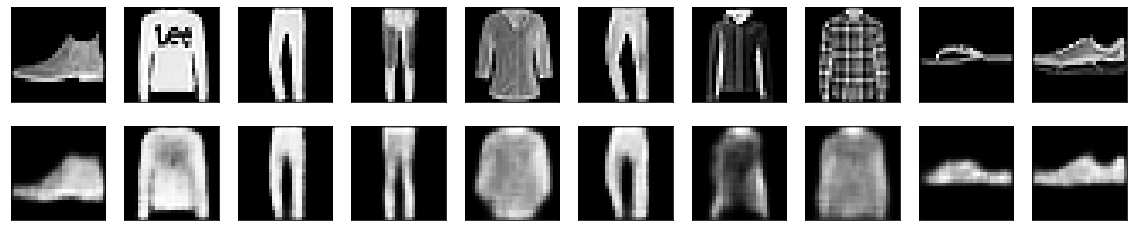

In [67]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

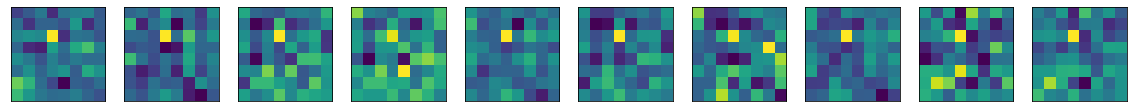

In [68]:
encoder = Model(input_img, bottleneck)
encoded_imgs = encoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(8, 8).T, cmap="viridis")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Variational Autoencoder

> A VAE "is an autoencoder that learns a latent variable model for its input data. So instead of letting your neural network learn an arbitrary function, you are learning the parameters of a probability distribution modeling your data. If you sample points from this distribution, you can generate new input data samples: a VAE is a "generative model". -- https://blog.keras.io/building-autoencoders-in-keras.html

<img src="https://lilianweng.github.io/lil-log/assets/images/vae-gaussian.png">

> First, an encoder network turns the input samples x into two parameters in a latent space, which we will note z_mean and z_log_sigma. Then, we randomly sample similar points z from the latent normal distribution that is assumed to generate the data, via z = z_mean + $\exp$(z_log_sigma) * epsilon, where epsilon is a random normal tensor. Finally, a decoder network maps these latent space points back to the original input data.

Here, the loss includes the standard loss (e.g., MSE) for the image reconstruction and a measure of the difference between the distribution of the original data mapped to latent space and the random sampling in latent space. This K-L divergence is a form of information gain, a non-symmetric measure of the difference between two probability distributions.

In [69]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda

latent_dim = 2
input_img = Input(shape = (28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional


# shape info needed to build decoder model
shape = K.int_shape(x)

# generate latent vector Q(z|X)
x = Flatten()(x)
x = Dense(16, activation='relu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# reparameterization trick
# instead of sampling from Q(z|X), sample eps = N(0,I)
# then z = z_mean + sqrt(var)*eps
def sampling(args):
    """Reparameterization trick by sampling fr an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon


# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(input_img, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(shape[1] * shape[2] * shape[3], activation='relu')(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
outputs = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

# instantiate VAE model
outputs = decoder(encoder(input_img)[2])
vae = Model(input_img, outputs, name='vae')

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 28, 28, 16)   160         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 28, 28, 16)   64          conv2d_7[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 14, 14, 16)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [70]:
models = (encoder, decoder)
data = (x_test, y_test)

In [77]:
from tensorflow.keras.losses import mse, binary_crossentropy
image_size = x_train.shape[1]

# VAE loss = mse + kl_loss
reconstruction_loss = mse(K.flatten(input_img), K.flatten(outputs))

reconstruction_loss *= image_size * image_size

# this is the K-L divergence loss (information gain)
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
vae.summary()

W0815 23:35:32.910071 4568503744 training_utils.py:1101] Output decoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to decoder.


Model: "vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 2), (None, 2 4100        input_2[0][0]                    
__________________________________________________________________________________________________
decoder (Model)                 (None, 28, 28, 1)    2865        encoder[1][2]                    
__________________________________________________________________________________________________
tf_op_layer_Reshape_3 (TensorFl [(None,)]            0           decoder[1][0]                    
________________________________________________________________________________________________

In [81]:
FIT=False

if FIT:
    vae.fit(x_train,
          epochs=50,
          batch_size=batch_size,
          validation_data=(x_test, None))
    vae.save_weights('nn_results/vae_cnn_fashion_70.h5')
else:
    from keras.models import load_model
    import tensorflow as tf
    
    vae.load_weights("nn_results/colombia_vae_cnn_fashion_70.h5")


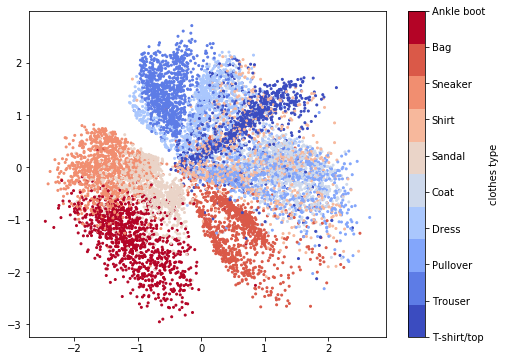

In [82]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)

lookup = {0: "T-shirt/top",
          1: "Trouser",
          2: "Pullover",
          3: "Dress",
          4: "Coat",
          5: "Sandal",
          6: "Shirt",
          7: "Sneaker",
          8: "Bag",
          9: "Ankle boot"}

cmap = plt.cm.get_cmap('coolwarm', 10)

plt.figure(figsize=(8, 6))
plt.scatter(x_test_encoded[0][:,1], x_test_encoded[0][:,0], c=y_test,cmap=cmap, s=4)
cbar = plt.colorbar(ticks =np.arange(10), label='clothes type')
cbar.ax.set_yticklabels([lookup[i] for i in range(10)])
plt.show()

Each of these colored clusters is a type of clothing. Close clusters are clothes that are structurally similar (i.e. clothes that share information in the latent space).

Since VAEs are generative models, we can also use it to generate new clothes. Here we will scan the latent plane, sampling latent points at regular intervals, and generating the corresponding piece of clothes for each of these points. This gives us a visualization of the latent manifold that "generates" new clothes.

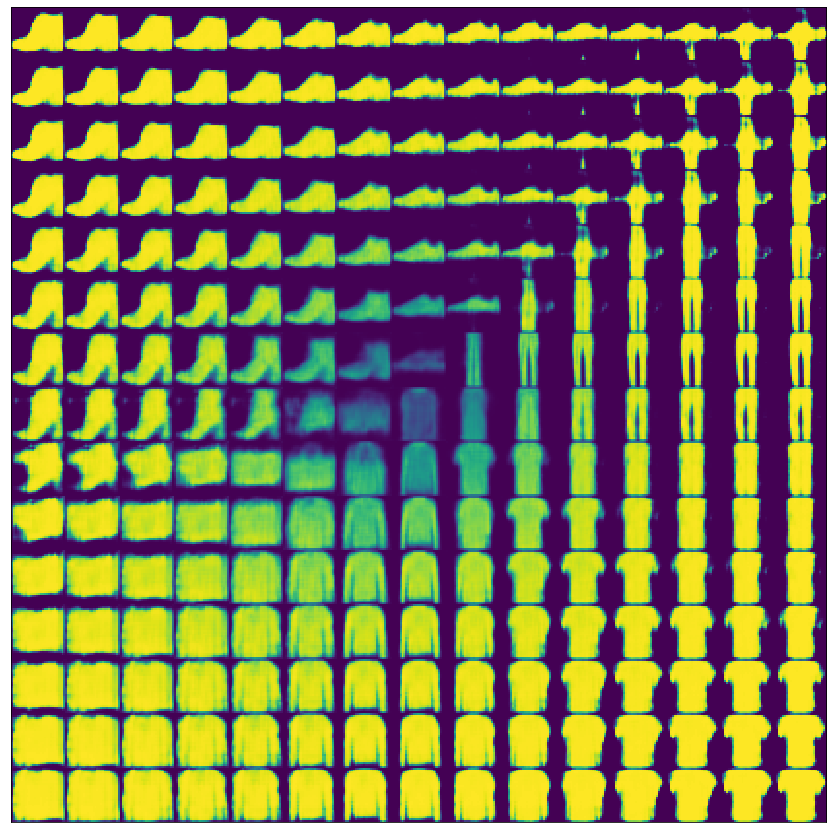

In [83]:
# display a 2D manifold of the clother
n = 15  # figure with 15x15 clothes
im_size = 28
figure = np.zeros((im_size * n,im_size * n))
# we will sample n points within [-5, 5] standard deviations
grid_x = np.linspace(-5, 5, n)
grid_y = np.linspace(-5, 5, n)

epsilon_std = 1.0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]]) * epsilon_std
        x_decoded = decoder.predict(z_sample)
        cloth = x_decoded[0].reshape(im_size, im_size)
        figure[i * im_size: (i + 1) * im_size,
               j * im_size: (j + 1) * im_size] = cloth

fig, ax = plt.subplots(figsize=(15, 15))
        
ax.imshow(figure, cmap="viridis")
ax.grid(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

TRIPPY!

## Generative Adversarial Networks

One of the downsides of VAEs is that the generated samples are interpolated between real samples as you walk through the latent space. This can lead to unrealistic looking images (what's half way between a shoe and a sweater?).

<img src="gans.png">
Source: Mihaela Rosca, DeepMind

Another way to create non-parametric generative models--with more realistic imagined samples--is with GANs. GANs are the result of a competition between a network which tries to generate realistic data (generator) and a network which tries to get learn how to distinguish between fake data and real data from the sample (discriminator).

A really good set of tutorials on GANs: https://sites.google.com/view/cvpr2018tutorialongans/

### The basic idea 

<img src="https://lilianweng.github.io/lil-log/assets/images/GAN.png">

**Let's Check out an Online Demo**: https://poloclub.github.io/ganlab/


<img src="faces.png">
Source: Ian Goodfellow


By Dec 2018, extremely photorealistic images were able to be generated. An example of the high-quality results from the latest GAN work, the following pictures are not of real people but instead are generated:

<img src="https://cdn.technologyreview.com/i/images/screen-shot-2018-12-14-at-10.13.53-am.png?sw=2544&cx=0&cy=0&cw=594&ch=262">

https://www.technologyreview.com/s/612612/these-incredibly-real-fake-faces-show-how-algorithms-can-now-mess-with-us/

**Check this out**: https://thispersondoesnotexist.com/

## So What Good Can You Do with GANs?


Some unethical/questionable uses... https://en.wikipedia.org/wiki/Deepfake
Such as: https://www.foxnews.com/tech/app-undressed-women-backlash

Better use for astronomy!

** Useful to create inputs to simulations **

<img src="http://www.yaronhadad.com/wp-content/uploads/2017/03/WEB_lead_Nguyen-and-Mandelbaum.jpg">
Source: AI-generated images of galaxies (left, lower of each pair) and volcanoes. Left: Figure: S. Ravanbakhsh/data: arxiv.org/abs/1609.05796; Right: Nguyen et al./arxiv.org/abs/1612.00005

** Creativity and Marketing **

<img src="https://github.com/maxorange/pix2vox/raw/master/img/sample.gif">
<img src="https://github.com/maxorange/pix2vox/raw/master/img/single-category-generation.png">
Pix2VOX: https://github.com/maxorange/pix2vox

<img src="fashion.png">

** Inhancement / Superresolution **

<img src="super.png">